In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Import data

In [2]:
tlk1_path = '../data/talker_1_2_v0_talker_1.pkl'
tlk2_path = '../data/talker_1_2_v0_talker_2.pkl'

In [21]:
df1 = pd.read_pickle(tlk1_path)
df2 = pd.read_pickle(tlk2_path)

print(df1.shape, df2.shape)

(10996, 4) (10998, 4)


In [30]:
df1.local_time

0          0.017898
1          0.037903
2          0.057876
3          0.077964
4          0.098023
            ...    
10991    219.837871
10992    219.857869
10993    219.877865
10994    219.898046
10995    219.917859
Name: local_time, Length: 10996, dtype: float64

In [75]:
df2.local_time

0          0.004289
1          0.024337
2          0.044340
3          0.064330
4          0.084337
            ...    
10993    219.864500
10994    219.884534
10995    219.904503
10996    219.924496
10997    219.944482
Name: local_time, Length: 10998, dtype: float64

In [6]:
df1.head()

,ms_ids,ros_time,local_time,words
0,0,1.599081e+09,0.017898,talker_1 data
1,1,1.599081e+09,0.037903,talker_1 data
2,2,1.599081e+09,0.057876,talker_1 data
3,3,1.599081e+09,0.077964,talker_1 data
4,4,1.599081e+09,0.098023,talker_1 data


In [7]:
df2.head()

,ms_ids,ros_time,local_time,words
0,0,1.599081e+09,0.004289,talker_2 data
1,1,1.599081e+09,0.024337,talker_2 data
2,2,1.599081e+09,0.044340,talker_2 data
3,3,1.599081e+09,0.064330,talker_2 data
4,4,1.599081e+09,0.084337,talker_2 data


### ROS time comparison

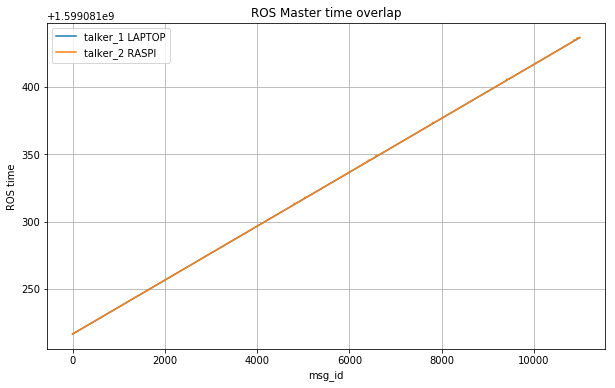

In [27]:

plt.figure(figsize=(10,6))
plt.plot(df1.ros_time)
plt.plot(df2.ros_time)
plt.grid()
plt.title('ROS Master time overlap')

plt.xlabel('msg_id')
plt.ylabel('ROS time')
plt.legend(['talker_1 LAPTOP', 'talker_2 RASPI'])

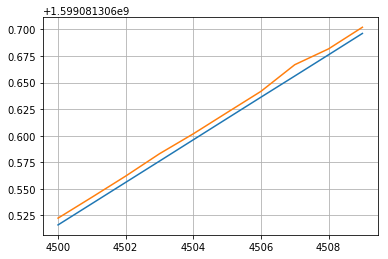

In [76]:
plt.plot(df1.ros_time[4500:4510])
plt.plot(df2.ros_time[4500:4510])
plt.grid()

### Local time comparison

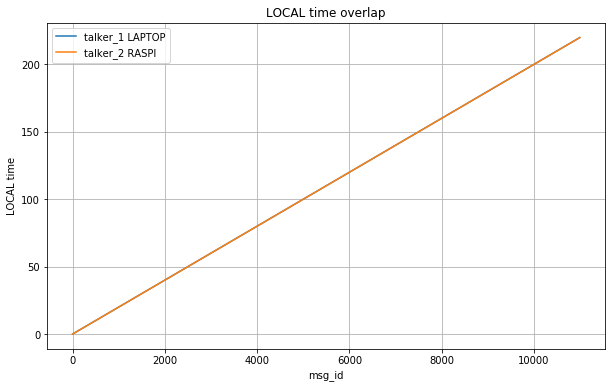

In [77]:

plt.figure(figsize=(10,6))
plt.plot(df1.local_time)
plt.plot(df2.local_time)
plt.grid()
plt.title('LOCAL time overlap')

plt.xlabel('msg_id')
plt.ylabel('LOCAL time')
plt.legend(['talker_1 LAPTOP', 'talker_2 RASPI'])

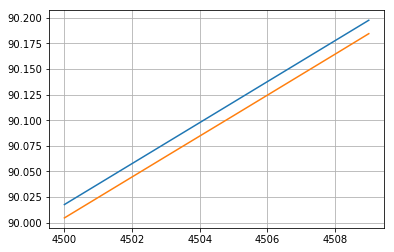

In [78]:
plt.plot(df1.local_time[4500:4510])
plt.plot(df2.local_time[4500:4510])
plt.grid()

### Difference between ROS MASTER time

Text(0.5,1,'Talker_1 - Talker_2 difference in ROS time')

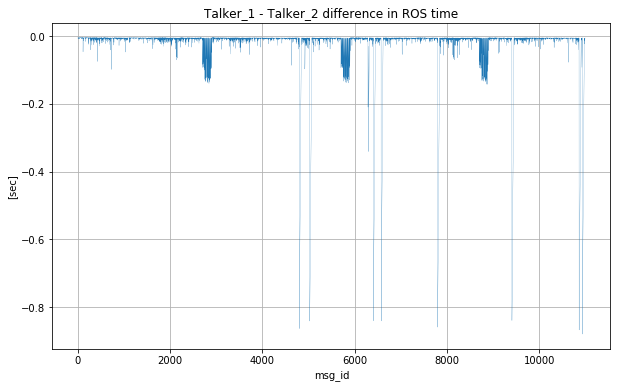

In [79]:
plt.figure(figsize=(10,6))
rdif = df1.ros_time-df2.ros_time
plt.plot(rdif, LineWidth=.2)
plt.grid()

plt.xlabel('msg_id')
plt.ylabel('[sec]')
plt.title('Talker_1 - Talker_2 difference in ROS time')

In [48]:
rdif.describe()

count    10996.000000
mean        -0.023729
std          0.088490
min         -0.879742
25%         -0.007507
50%         -0.005832
75%         -0.005418
max         -0.004211
Name: ros_time, dtype: float64

### Difference between LOCAL time

Text(0.5,1,'Talker_1 - Talker_2 difference in LOCAL time')

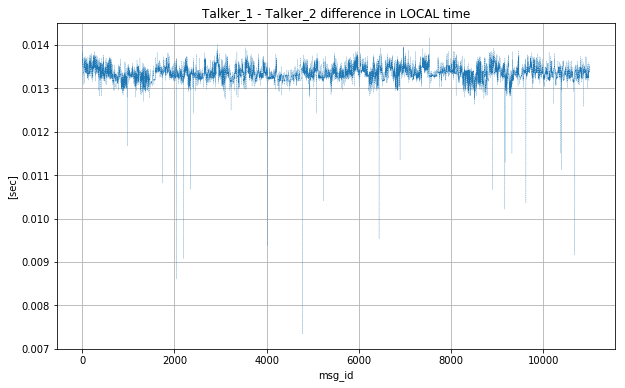

In [73]:
plt.figure(figsize=(10,6))

ldif = df1.local_time-df2.local_time

plt.plot(ldif, '-.', LineWidth=.2)
plt.grid()

plt.xlabel('msg_id')
plt.ylabel('[sec]')
plt.title('Talker_1 - Talker_2 difference in LOCAL time')

In [74]:
ldif.describe()

count    10996.000000
mean         0.013335
std          0.000200
min          0.007341
25%          0.013251
50%          0.013338
75%          0.013417
max          0.014165
Name: local_time, dtype: float64